## Importação dos pacotes

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

## Importação da base

In [3]:
# Importando a base de Acessos e colocando o campo 'Data' como o index
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total_2011_2022.csv',index_col='Data',parse_dates=True)
df.index.freq = 'MS'
df.head(5)

,Acessos
Data,
2011-01-01,14508818
2011-02-01,14764348
2011-03-01,15058564
2011-04-01,15260984
2011-05-01,15486330


### Uso de Médias Móveis Simples

<AxesSubplot:xlabel='Data'>

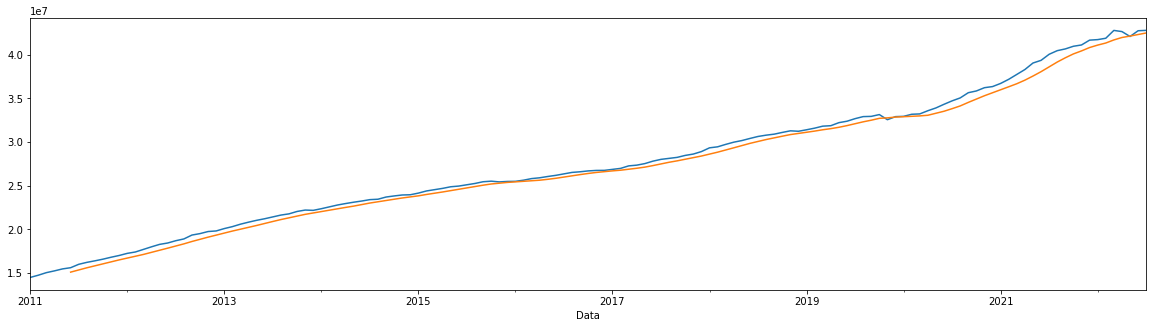

In [4]:
#Médias móveis com janela=6
df['Acessos'].plot(figsize=(20,5))
df['Acessos'].rolling(window =6).mean().plot()

In [5]:
mape = np.round(np.mean(np.abs(df['Acessos']-df['Acessos'].rolling(window =5).mean())/df['Acessos'])*100,2)

In [6]:
print(mape)

1.54


### Uso médias móveis simples em bases de treino e teste

In [7]:
df.shape

(139, 1)

In [8]:
#Separação em treino e teste
#Treino 91%.  Deixamos uma base maior de treino para pegar o período da covid
train_len = 127
train = df[0:train_len] # Primeiros 127 dados para treinamento (91%)
test = df[train_len:] # Últimos 12 dados como período de teste (9%)

In [9]:
#Médias móveis simples
y_hat_sma = df.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = df['Acessos'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [10]:
#Visualização das previsões no dataframe
y_hat_sma.head(50)

,Acessos,sma_forecast
Data,,
2011-01-01,14508818,NaN
2011-02-01,14764348,NaN
2011-03-01,15058564,NaN
2011-04-01,15260984,NaN
2011-05-01,15486330,NaN
2011-06-01,15622713,1.511696e+07
2011-07-01,16011957,1.536748e+07
2011-08-01,16234050,1.561243e+07
2011-09-01,16409889,1.583765e+07


In [11]:
y_hat_sma.tail(15)

,Acessos,sma_forecast
Data,,
2021-05-01,39040080,3.754958e+07
2021-06-01,39345594,3.804973e+07
2021-07-01,40040504,3.860560e+07
2021-08-01,40453434,3.860560e+07
2021-09-01,40652832,3.860560e+07
2021-10-01,40956803,3.860560e+07
2021-11-01,41104946,3.860560e+07
2021-12-01,41657433,3.860560e+07
2022-01-01,41716841,3.860560e+07


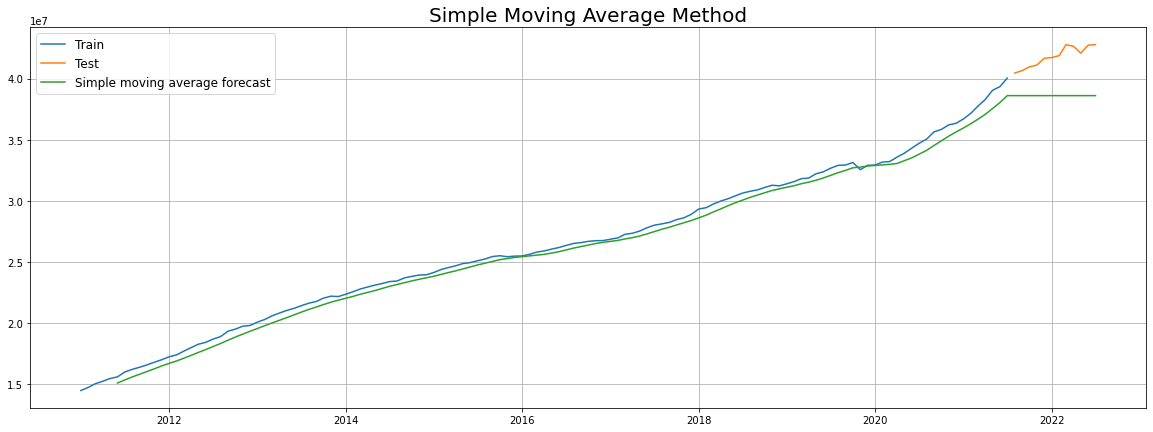

In [13]:
#Visualização dos dados 
plt.figure(figsize=(20,7))
plt.grid()
plt.plot(train['Acessos'], label='Train')
plt.plot(test['Acessos'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best', fontsize='12')
plt.title('Simple Moving Average Method', fontsize='20')
plt.show()

In [14]:
#Cálculo da acurácia da previsão
rmse = np.sqrt(mean_squared_error(test['Acessos'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-y_hat_sma['sma_forecast'][train_len:])/test['Acessos'])*100,2)

In [15]:
#Colocando as métricas num formato de dataframe
results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,3279983.19,7.57


### Uso médias móveis simples e exponencial

In [16]:
#Cálculo da média móvel simples de 6 dias
df['MM5'] = df["Acessos"].rolling(6).mean()
df.head(10)

,Acessos,MM5
Data,,
2011-01-01,14508818,NaN
2011-02-01,14764348,NaN
2011-03-01,15058564,NaN
2011-04-01,15260984,NaN
2011-05-01,15486330,NaN
2011-06-01,15622713,1.511696e+07
2011-07-01,16011957,1.536748e+07
2011-08-01,16234050,1.561243e+07
2011-09-01,16409889,1.583765e+07


In [17]:
#Cálculo da média móvel exponencial
df["MME5"] = df["Acessos"].ewm(span=6, min_periods=6).mean()
df

,Acessos,MM5,MME5
Data,,,
2011-01-01,14508818,NaN,NaN
2011-02-01,14764348,NaN,NaN
2011-03-01,15058564,NaN,NaN
2011-04-01,15260984,NaN,NaN
2011-05-01,15486330,NaN,NaN
...,...,...,...
2022-03-01,42768917,4.167956e+07,4.167825e+07
2022-04-01,42636758,4.195955e+07,4.195211e+07
2022-05-01,42076061,4.212141e+07,4.198752e+07


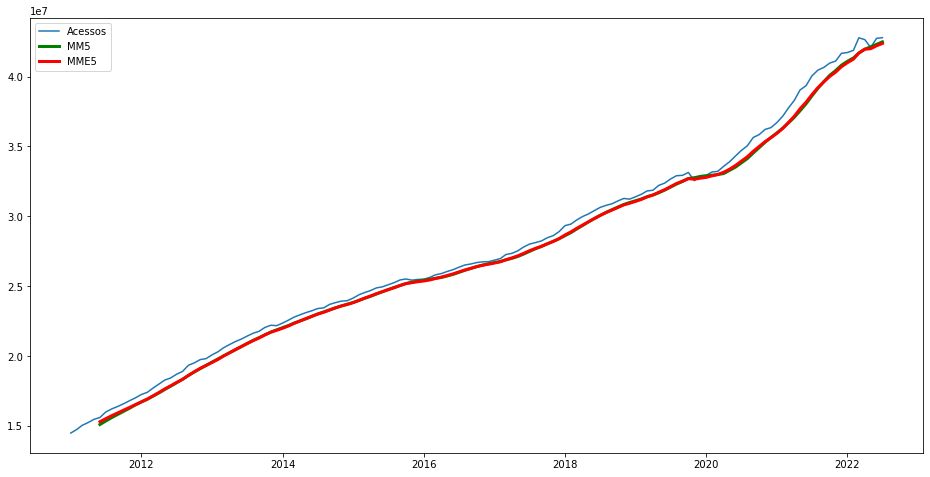

In [18]:
#Visualização dos resultados
plt.figure(figsize=(16,8))
plt.plot(df["Acessos"])
plt.plot(df["MM5"], color="green", linewidth=3)
plt.plot(df["MME5"], color="red", linewidth=3)
plt.legend(df)
plt.show()

In [19]:
#Médias móveis exponencial
y_hat_sma_e = df.copy()
ma_window = 6
y_hat_sma_e['sma_forecast_e'] = df["Acessos"].ewm(span=6, min_periods=6).mean()
y_hat_sma_e['sma_forecast_e'][train_len:] = y_hat_sma_e['sma_forecast_e'][train_len-1]

In [20]:
#Cálculo da acurácia da previsão
rmse = np.sqrt(mean_squared_error(test['Acessos'], y_hat_sma_e['sma_forecast_e'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-y_hat_sma_e['sma_forecast_e'][train_len:])/test['Acessos'])*100,2)

In [21]:
#Colocando as métricas num formato de dataframe
results_e = pd.DataFrame({'Method':['Exponencial moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results_e = results_e[['Method', 'RMSE', 'MAPE']]
results_e

,Method,RMSE,MAPE
0,Exponencial moving average forecast,3186077.19,7.34
